In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw

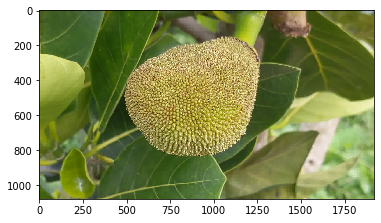

In [390]:
# img = cv2.imread("../collection/category/0000.jpg", 0)
img = cv2.imread("../find/bali26samples/jackfruit2.jpg")[...,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

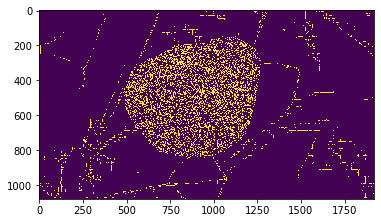

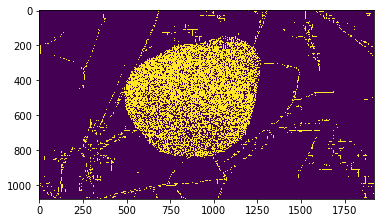

In [391]:
# edges = cv2.Canny(img, 10, 40, 1, L2gradient=True)   #DRAGONGRUIT4
edges = cv2.Canny(img, 30, 200, 3, L2gradient=False)
plt.imshow(edges)
plt.show()
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
plt.imshow(edges)

In [392]:
# # Gradient-X
# scale = 1
# delta = 0
# ddepth = cv2.CV_64F
# grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# # Gradient-Y
# grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)
# edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# plt.imshow(edges)

In [393]:
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) 

In [394]:
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
#  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

In [395]:
# plt.imshow(cv2.drawContours(img, max_contour, 0, (0,255,0), 3))

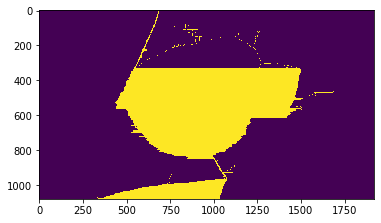

In [396]:
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))
plt.imshow(mask)
#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask



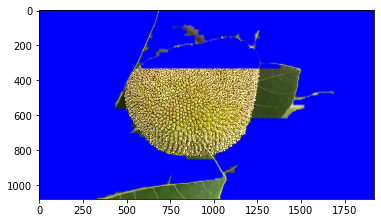

In [397]:
#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
plt.imshow(masked)

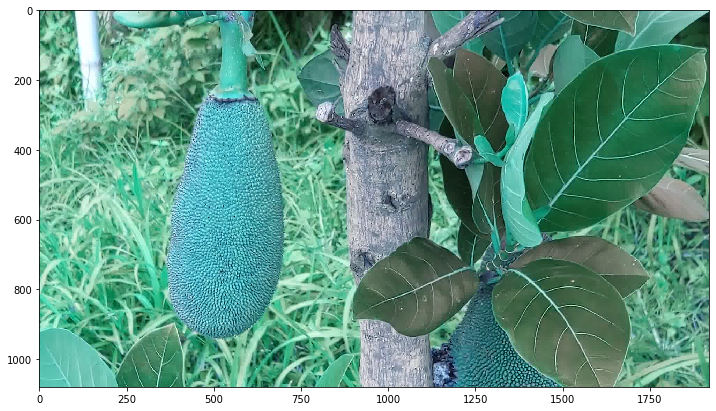

In [380]:
img = cv2.imread("../find/bali26samples/jackfruit1.jpg")
plt.figure(figsize=(12,12))
plt.imshow(img)

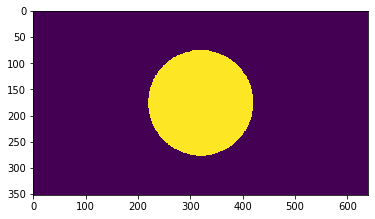

In [67]:
plt.imshow(low_pass)

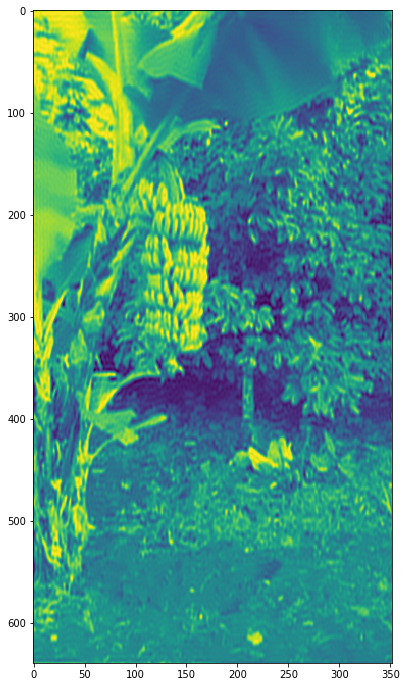

In [66]:
fft1 = np.fft.fftshift(np.fft.fft2(img))
x, y = img.shape
#size of circle
e_x,e_y=200,200
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))
low_pass=Image.new("L",(img.shape[0],img.shape[1]),color=0)
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)
low_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,low_pass_np.T)

#inverse fft
ifft2 = np.real(np.fft.ifft2(np.fft.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))
plt.figure(figsize=(12,12))
plt.imshow(ifft2.astype(np.uint8))

In [ ]:

#save the image
# imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))

In [297]:
img = cv2.imread("../collection/category/0000.jpg", 0)

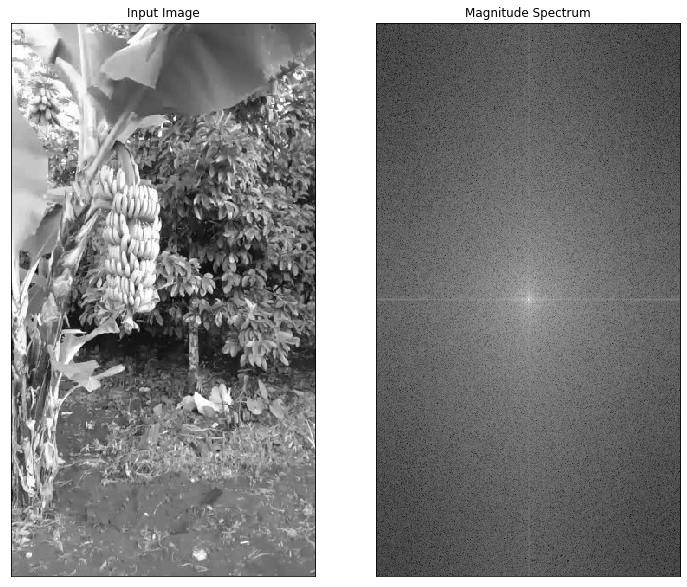

In [298]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

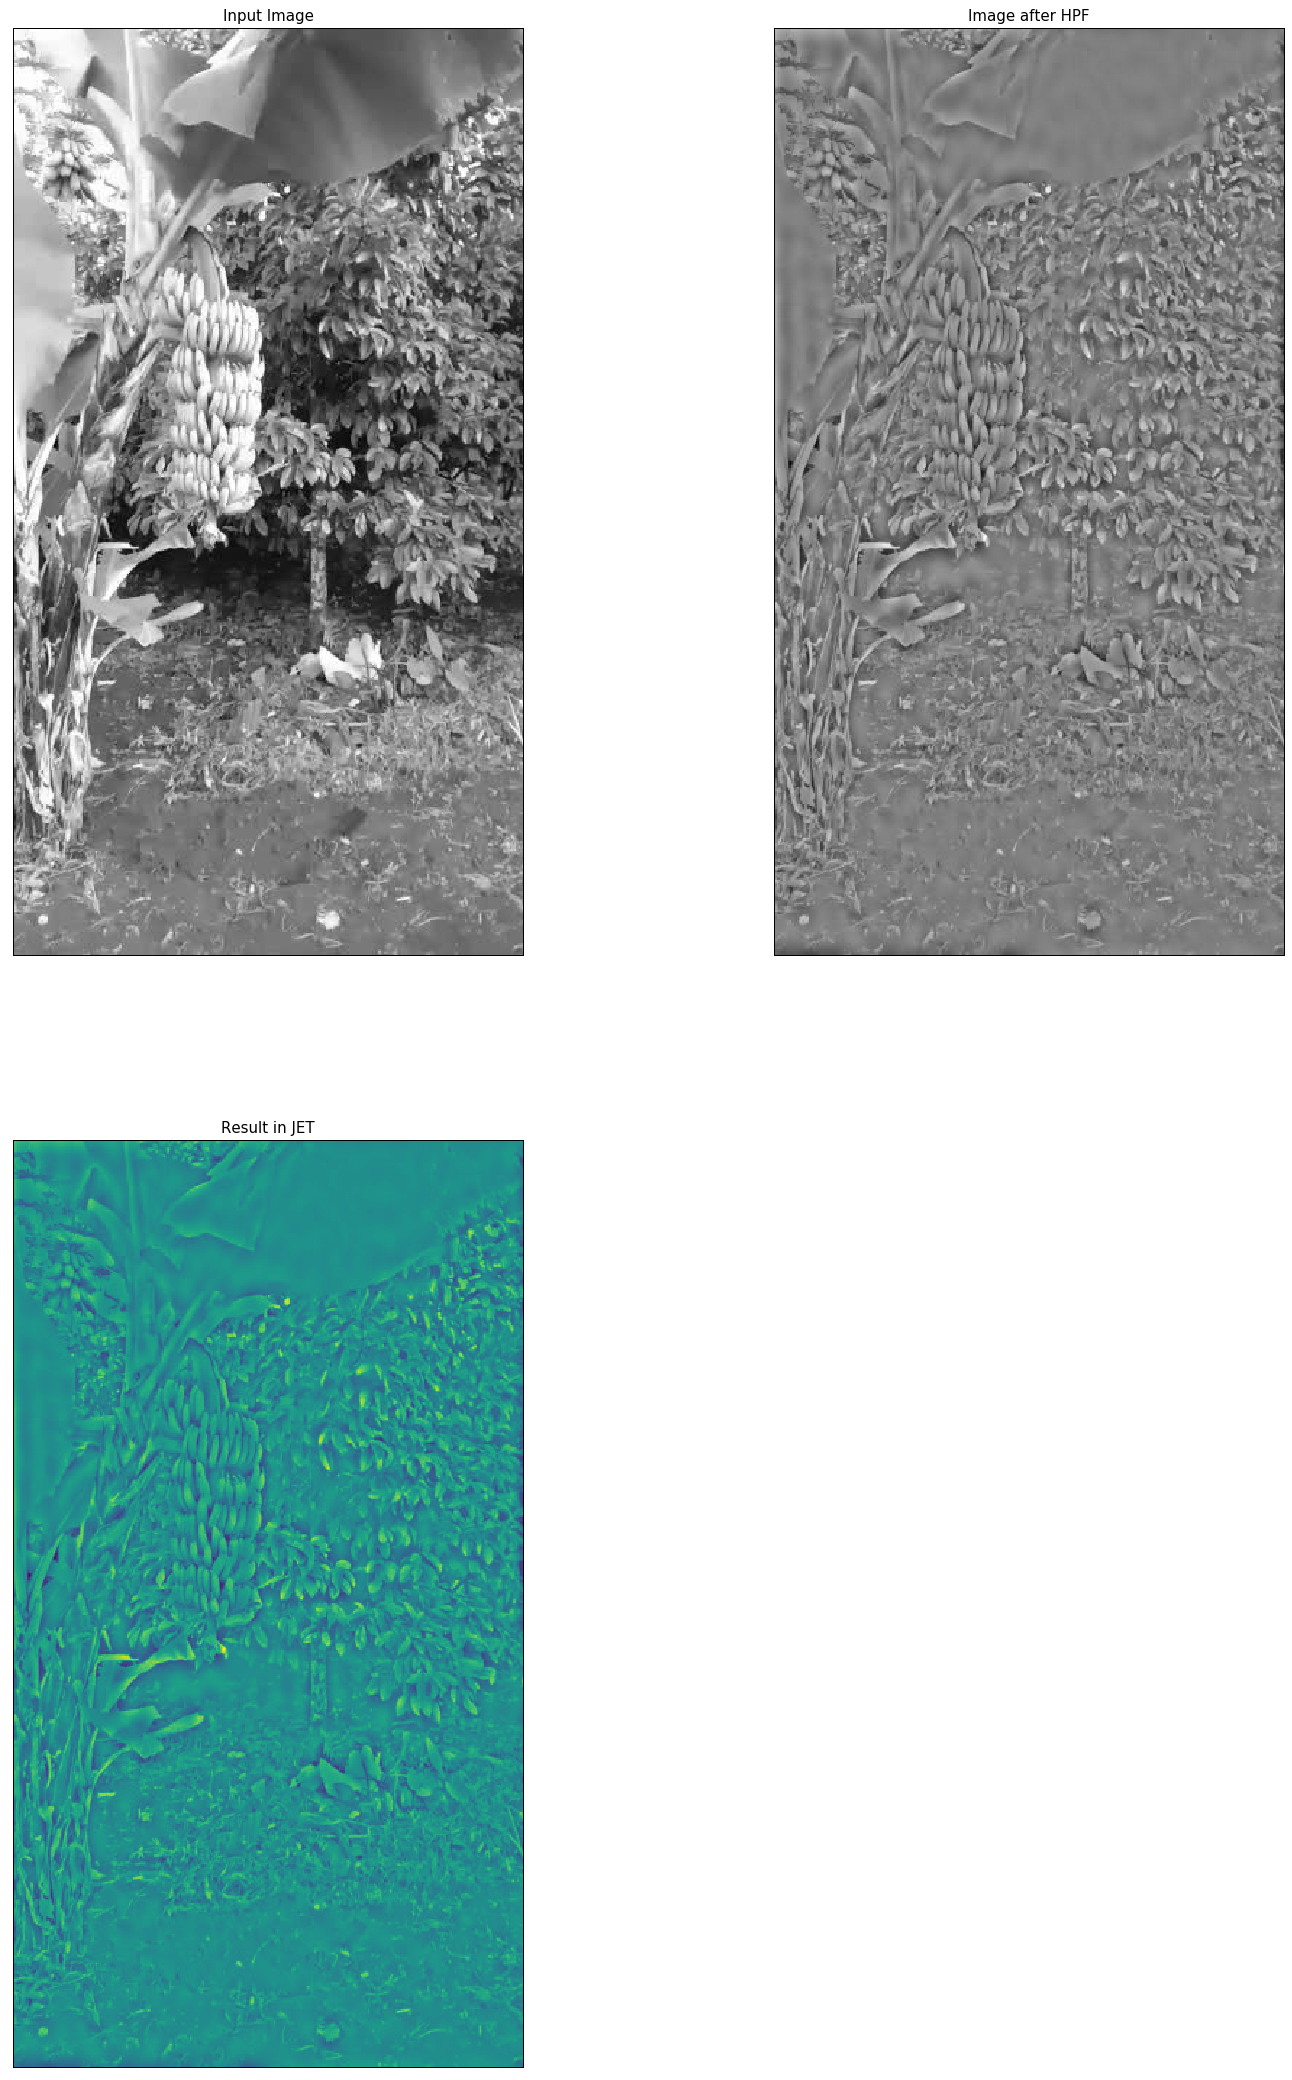

In [299]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-20:crow+21, ccol-20:ccol+21] = 0
# plt.figure(figsize=(20,30), dpi = 90)
# plt.imshow(np.real(fshift), cmap='gray')
# plt.show()
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.figure(figsize=(20,30), dpi = 90)
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

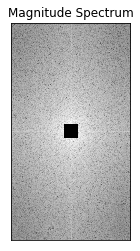

In [304]:
f = np.fft.fft2(img_back)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

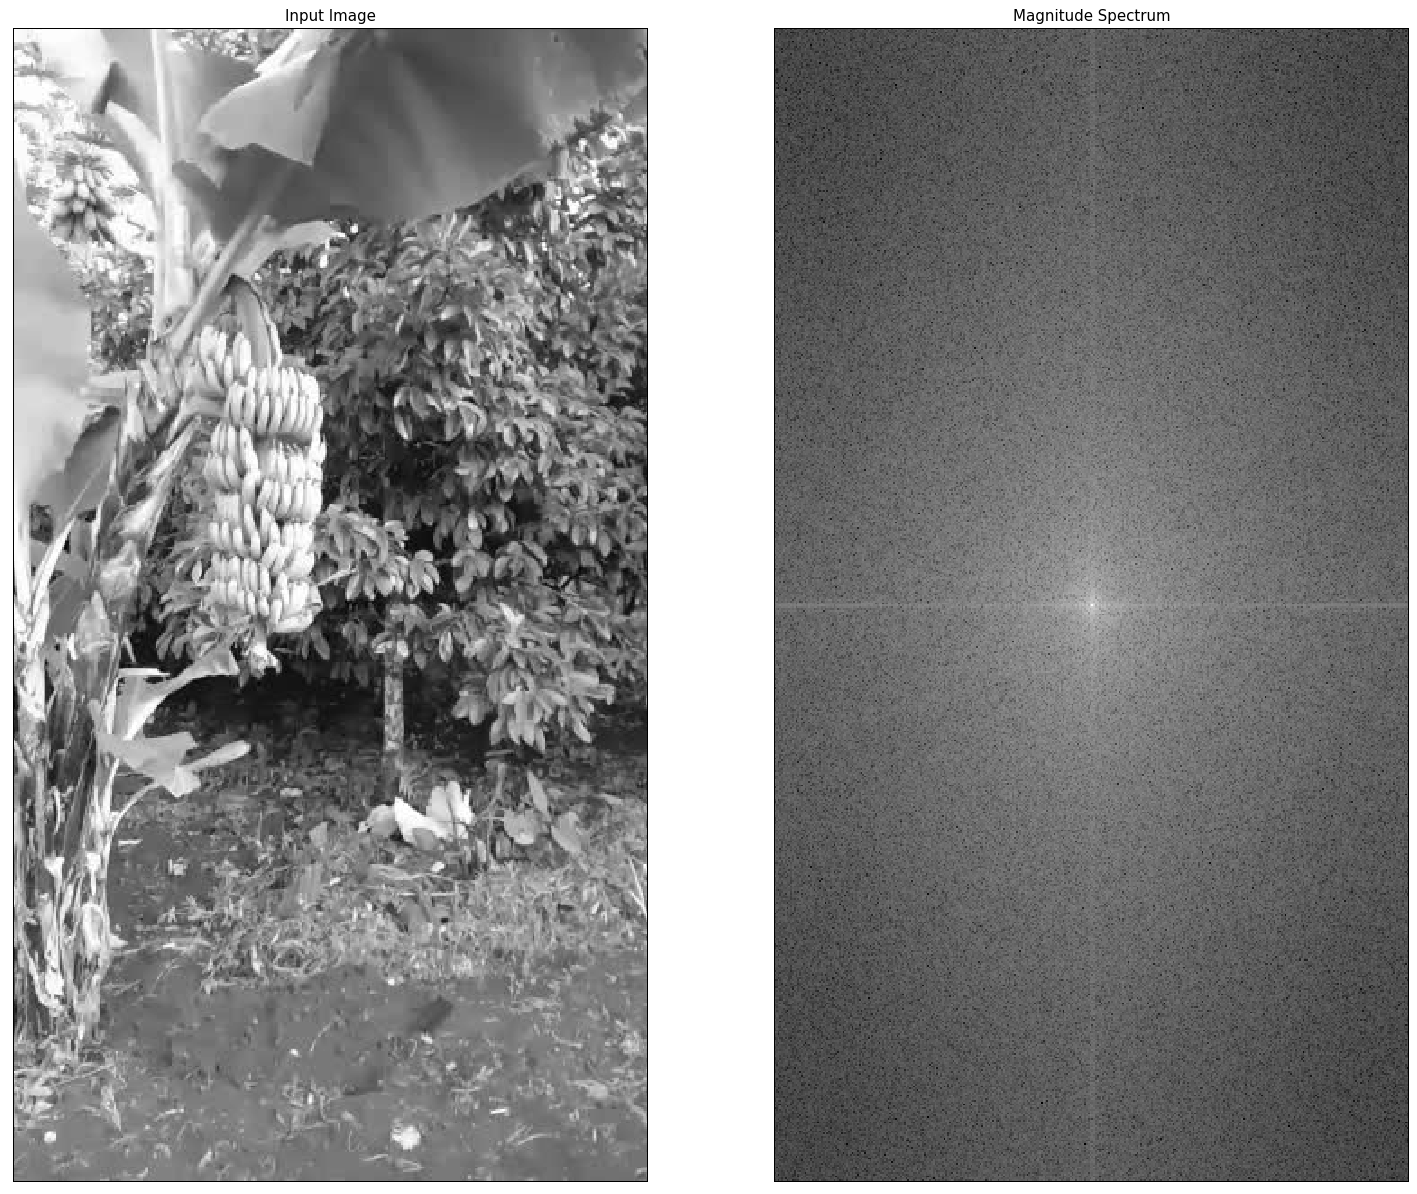

In [32]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(20,30), dpi = 90)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


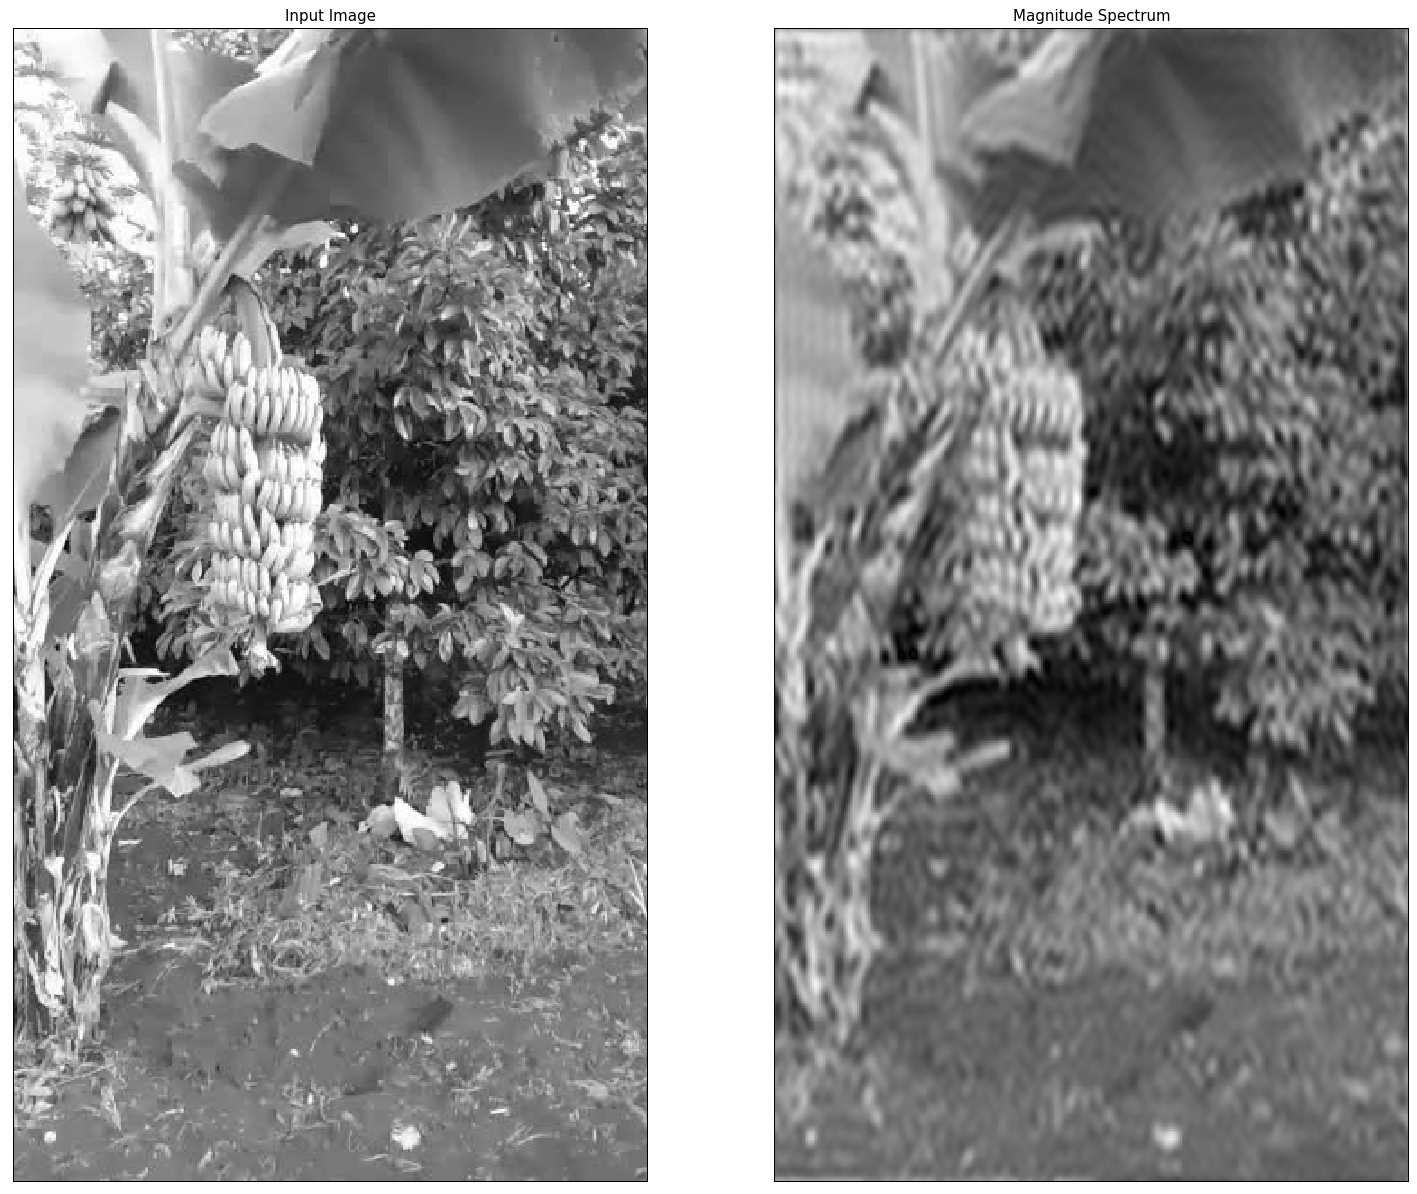

In [15]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-50:crow+50, ccol-50:ccol+50] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.figure(figsize=(20,30), dpi = 90)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
img = cv2.imread("../collection/category/0050.jpg", 0)

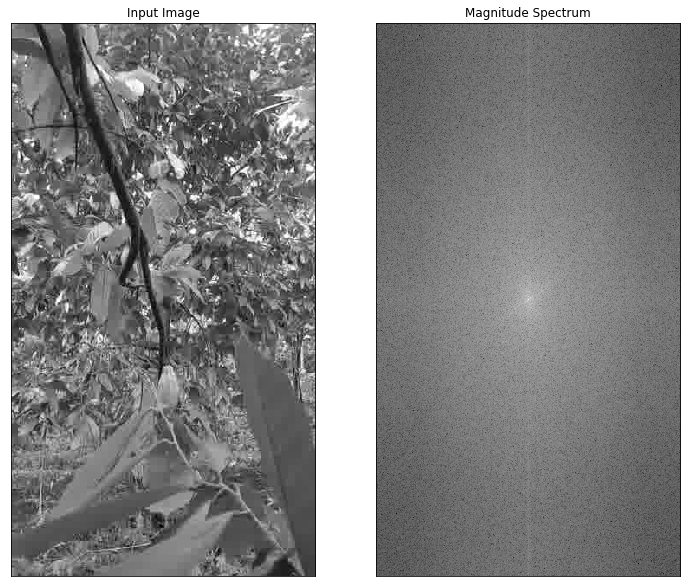

In [17]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

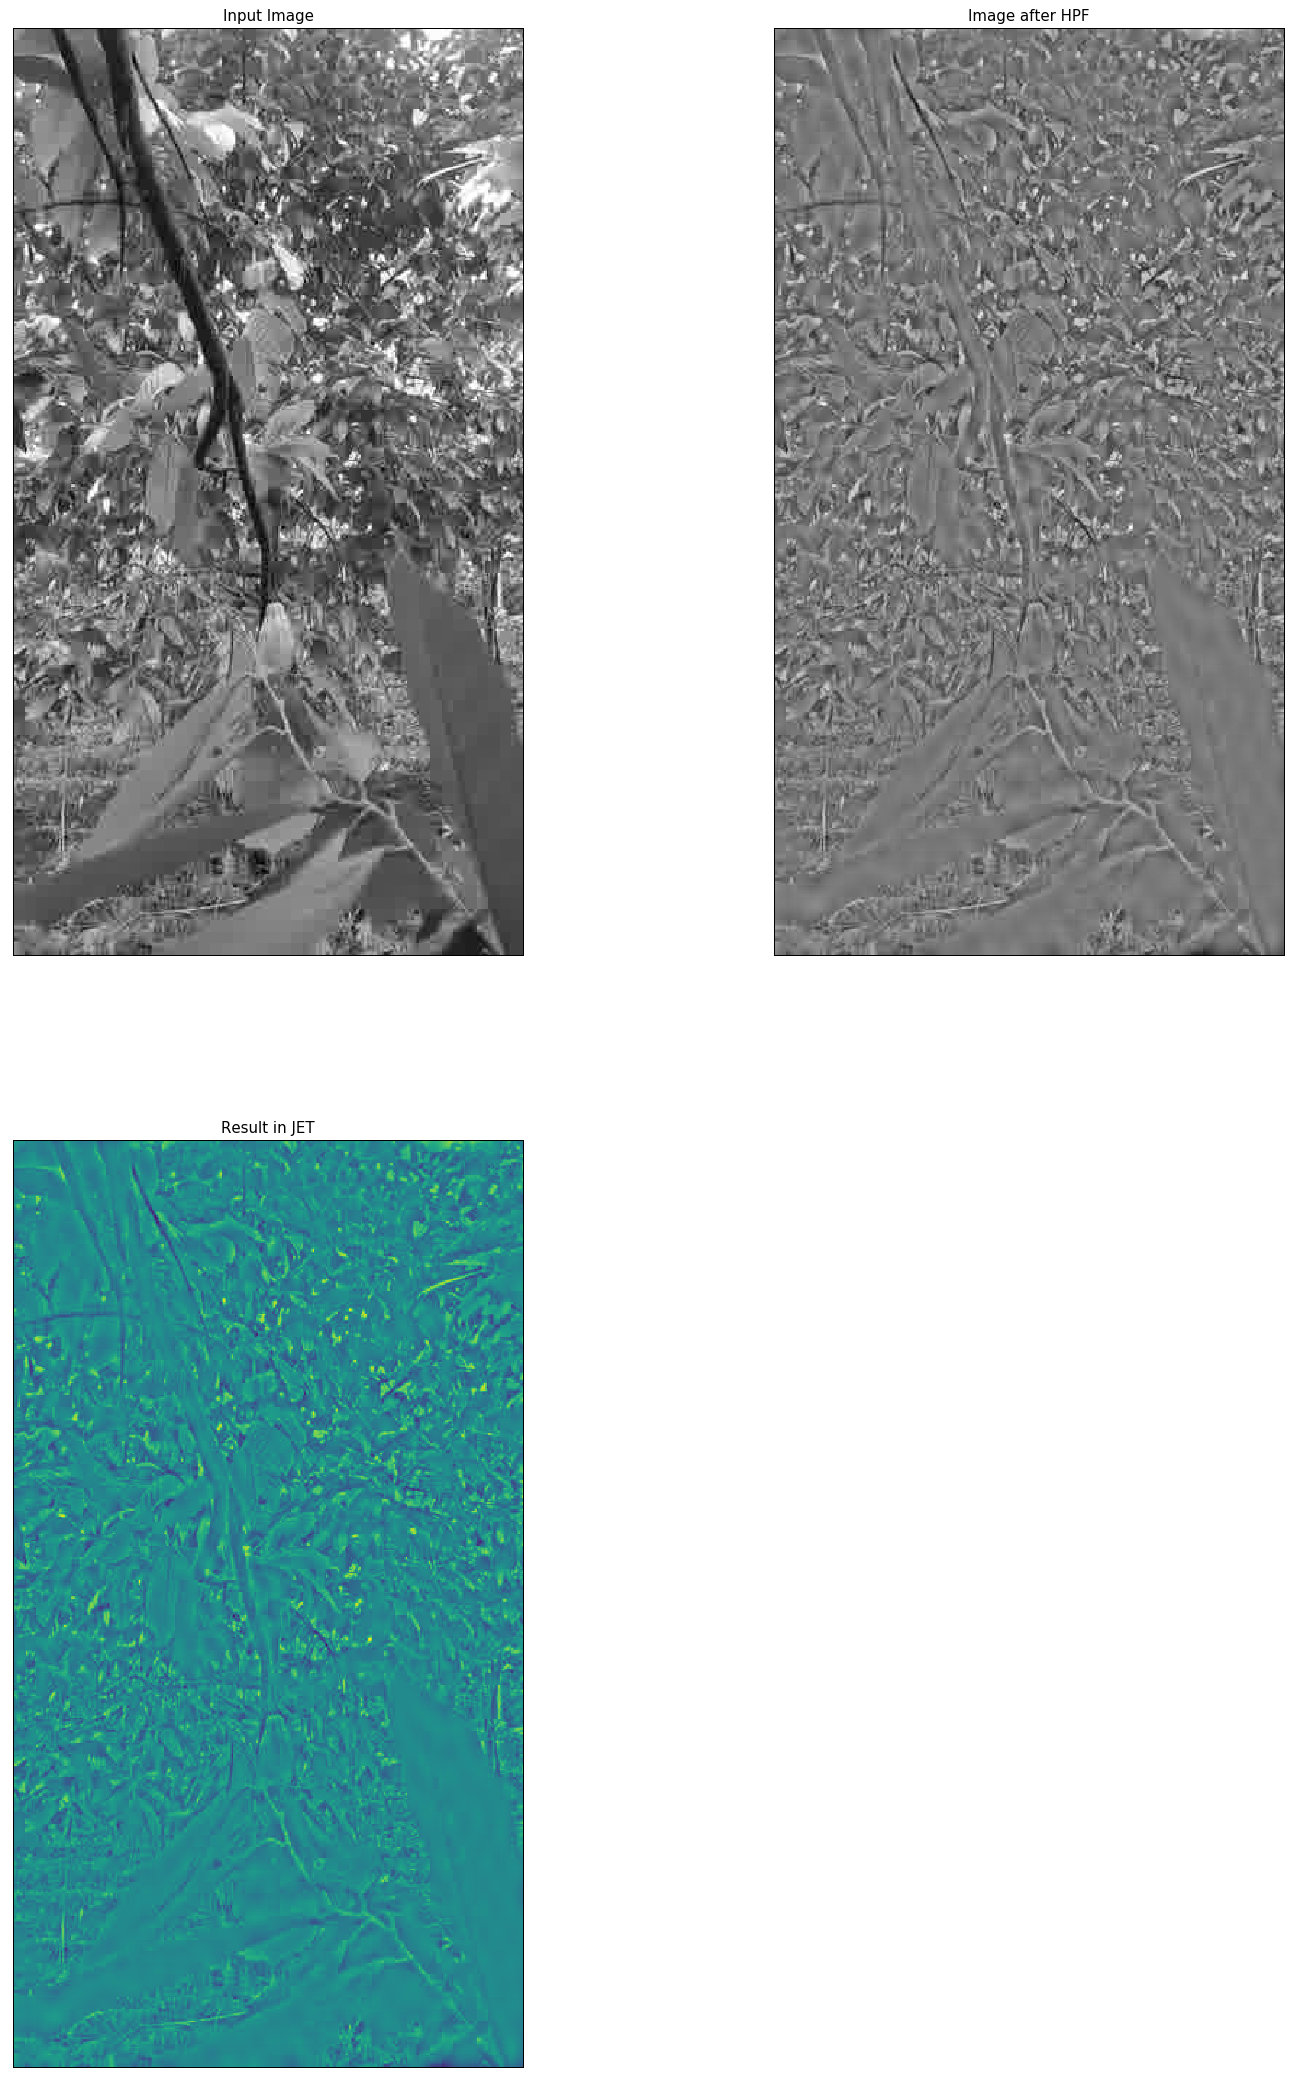

In [18]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-20:crow+21, ccol-20:ccol+21] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.figure(figsize=(20,30), dpi = 90)
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()